# **Training Using NavieBayes**

In [1]:
import numpy as np  
import pandas as pd
import re  
import nltk  
from sklearn.datasets import load_files  
nltk.download('stopwords')  
import pickle  
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df=pd.read_csv('/content/latest_ticket_data.csv')
df.head()

,Description,Category
0,hi since recruiter lead permission approve req...,CatetgoryD
1,re expire days hi ask help update passwords co...,CatetgoryD
2,verification warning hi has got attached pleas...,CatetgoryD
3,please dear looks blacklisted receiving mails ...,CatetgoryD
4,dear modules report report cost thank much reg...,CatetgoryD


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  3000 non-null   object
 1   Category     3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [4]:
df['Category'].value_counts()

CatetgoryD    600
CategoryB     600
CategoryC     600
CategoryE     600
CategoryA     600
Name: Category, dtype: int64

In [5]:
df.isnull().sum()

Description    0
Category       0
dtype: int64

In [6]:
c=df['Category'].astype('category')

In [7]:
codes=c.cat.codes
codes

0       4
1       4
2       4
3       4
4       4
       ..
2995    3
2996    3
2997    3
2998    3
2999    3
Length: 3000, dtype: int8

In [8]:
cats = c.cat.categories
cats

Index(['CategoryA', 'CategoryB', 'CategoryC', 'CategoryE', 'CatetgoryD'], dtype='object')

In [9]:
cats[codes]

Index(['CatetgoryD', 'CatetgoryD', 'CatetgoryD', 'CatetgoryD', 'CatetgoryD',
       'CatetgoryD', 'CatetgoryD', 'CatetgoryD', 'CatetgoryD', 'CatetgoryD',
       ...
       'CategoryE', 'CategoryE', 'CategoryE', 'CategoryE', 'CategoryE',
       'CategoryE', 'CategoryE', 'CategoryE', 'CategoryE', 'CategoryE'],
      dtype='object', length=3000)

In [10]:
c = df.Category.astype('category')

d = dict(enumerate(c.cat.categories))
print (d)


{0: 'CategoryA', 1: 'CategoryB', 2: 'CategoryC', 3: 'CategoryE', 4: 'CatetgoryD'}


In [11]:
data=df.copy()

In [12]:
data['target'] = data.Category.astype('category').cat.codes

In [13]:
data.head()

,Description,Category,target
0,hi since recruiter lead permission approve req...,CatetgoryD,4
1,re expire days hi ask help update passwords co...,CatetgoryD,4
2,verification warning hi has got attached pleas...,CatetgoryD,4
3,please dear looks blacklisted receiving mails ...,CatetgoryD,4
4,dear modules report report cost thank much reg...,CatetgoryD,4


In [14]:
data.drop('Category',axis=1,inplace=True)

In [15]:
data.head()

,Description,target
0,hi since recruiter lead permission approve req...,4
1,re expire days hi ask help update passwords co...,4
2,verification warning hi has got attached pleas...,4
3,please dear looks blacklisted receiving mails ...,4
4,dear modules report report cost thank much reg...,4


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  3000 non-null   object
 1   target       3000 non-null   int8  
dtypes: int8(1), object(1)
memory usage: 26.5+ KB


In [17]:
X=data['Description']
Y=data['target']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [18]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(ngram_range=(1,2),stop_words=stopwords.words('english'))
X_1=vectorizer.fit_transform(x_train)

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()

X_tfidf = tfidfconverter.fit_transform(X_1)

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [22]:
text_clf=Pipeline([('vect',CountVectorizer(ngram_range=(1,2),stop_words=stopwords.words('english'))),('tfidf',TfidfTransformer()),('clf',MultinomialNB())])

text_clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",...
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itse

In [23]:
predicted = text_clf.predict(x_test)
predicted

array([4, 0, 1, 0, 3, 2, 2, 3, 1, 0, 1, 1, 1, 4, 1, 2, 0, 3, 4, 0, 2, 2,
       4, 1, 0, 4, 0, 0, 0, 4, 0, 1, 2, 4, 1, 0, 4, 1, 2, 1, 1, 0, 0, 4,
       4, 4, 3, 3, 0, 4, 4, 1, 3, 2, 1, 3, 2, 4, 0, 0, 2, 3, 0, 1, 2, 0,
       1, 4, 0, 4, 2, 1, 1, 3, 1, 4, 4, 1, 1, 1, 1, 4, 4, 0, 3, 0, 4, 3,
       2, 3, 2, 1, 3, 0, 4, 4, 4, 4, 4, 4, 3, 3, 0, 4, 4, 0, 1, 1, 4, 2,
       2, 1, 1, 0, 2, 4, 2, 1, 4, 4, 0, 0, 2, 2, 3, 0, 1, 0, 3, 2, 4, 2,
       3, 2, 4, 4, 2, 1, 3, 4, 0, 0, 2, 2, 4, 2, 2, 2, 1, 3, 3, 3, 2, 2,
       1, 3, 2, 4, 4, 4, 3, 4, 4, 3, 3, 2, 1, 3, 2, 0, 4, 2, 2, 1, 2, 4,
       0, 1, 3, 3, 4, 1, 0, 1, 2, 1, 1, 0, 0, 4, 2, 3, 4, 2, 1, 4, 3, 4,
       3, 0, 3, 1, 4, 0, 1, 1, 0, 4, 2, 1, 0, 0, 1, 0, 2, 0, 0, 4, 0, 3,
       4, 2, 2, 4, 0, 0, 2, 1, 1, 1, 2, 3, 4, 1, 1, 2, 0, 3, 1, 2, 0, 3,
       3, 4, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 4, 0, 4, 1, 0, 2, 4, 4, 3,
       3, 3, 4, 3, 2, 4, 3, 0, 3, 2, 3, 3, 2, 4, 2, 4, 2, 4, 1, 2, 1, 0,
       1, 4, 4, 2, 4, 4, 2, 1, 1, 4, 2, 4, 4, 4, 3,

In [24]:
prediction_acc = np.mean(predicted == y_test)
prediction_acc

0.7283333333333334

In [25]:

from sklearn.metrics import accuracy_score

pred = text_clf.predict(x_test)
acc = accuracy_score(y_test, pred)
acc

0.7283333333333334

In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
predicted = text_clf.predict(x_test)
prediction_acc = np.mean(predicted == y_test)
print("Confusion matrix without GridSearch:")
print(metrics.confusion_matrix(y_test, predicted))
print("Mean without GridSearch: " + str(prediction_acc))

Confusion matrix without GridSearch:
[[78  5  5 10 28]
 [ 0 98  7  1  4]
 [ 6 14 84  1  3]
 [17  6  6 84 14]
 [ 9 19  1  7 93]]
Mean without GridSearch: 0.7283333333333334


Text(54.260000000000005, 0.5, 'predicted label')

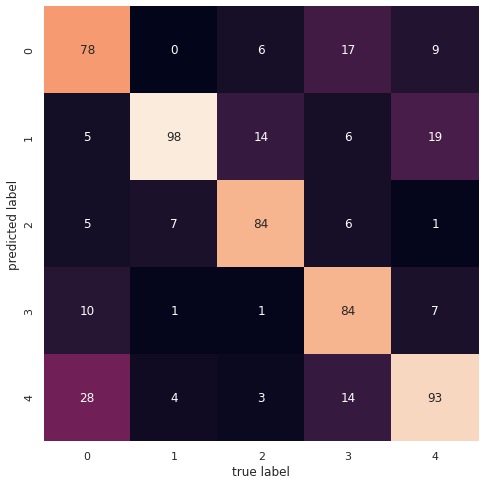

In [27]:
import seaborn as sns
mat = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 8))
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('true label')
plt.ylabel('predicted label')

In [28]:
%matplotlib inline
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.71      0.62      0.66       126
           1       0.69      0.89      0.78       110
           2       0.82      0.78      0.80       108
           3       0.82      0.66      0.73       127
           4       0.65      0.72      0.69       129

    accuracy                           0.73       600
   macro avg       0.74      0.73      0.73       600
weighted avg       0.74      0.73      0.73       600



# **Fitting on Original dataset without train/split.**

In [29]:
text_clf=Pipeline([('vect',CountVectorizer(ngram_range=(1,2),stop_words=stopwords.words('english'))),('tfidf',TfidfTransformer()),('clf',MultinomialNB())])

text_clf.fit(X,Y)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",...
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itse

In [ ]:
from sklearn.metrics import accuracy_score

pred = text_clf.predict(x_test)
acc = accuracy_score(y_test, pred)
acc

0.9216666666666666

# **LSTM**

In [ ]:
training_sentences=[]
for i in data['Description']:
  training_sentences.append(i)

In [ ]:
training_sentences[519]

'sr stack issues hello please kind help out by by pm kindest regards leader tuesday re sr stack issues hi thanks how issues translate user impact thrown please ensure advise working rd party thank re sr stack issues hello issue experienced under reported users more less getting common did hear complaints lot users best regards engineer ext tuesday re sr stack issues hi guys issues meantime please again include thank sr stack issues yesterday senior engineer please consider environment print attach re sr stack issues hello kind reminder problem persist shall next logs stack link change switch stack stack port switch down stack link change switch stack stack port switch down redundancy standby lost standby processor fault peer present redundancy standby lost standby processor fault peer down redundancy standby lost standby processor fault peer redundancy change down session handle going down reason failure destroyed session destroyed neigh proc handle act dual neighbor down peer down not

In [ ]:
len(training_sentences)

3000

Vocab_size=5100

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words = 5100, oov_token="[UNK]")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)

In [ ]:
sequences[0]

[4, 245, 2873, 104, 778, 487, 3542, 1214, 2, 140, 11, 2873]

In [ ]:
max_len=0
for j,i in enumerate(sequences):
  if len(i)>max_len:
    max_len=len(i)
  if len(i)==927:
    print(j)
    print(i)  

print(max_len)

519
[964, 428, 87, 6, 2, 14, 18, 99, 23, 23, 12, 726, 3, 346, 28, 10, 964, 428, 87, 4, 11, 103, 87, 3079, 105, 1248, 3080, 2, 597, 154, 58, 294, 942, 5, 10, 964, 428, 87, 6, 46, 1247, 210, 525, 177, 92, 1194, 563, 1500, 101, 1622, 2318, 624, 177, 17, 3, 20, 42, 28, 10, 964, 428, 87, 4, 145, 87, 1997, 2, 178, 564, 5, 964, 428, 87, 519, 38, 20, 2, 260, 173, 262, 1414, 10, 964, 428, 87, 6, 14, 533, 80, 2280, 1730, 172, 804, 428, 68, 72, 279, 428, 428, 171, 279, 74, 428, 68, 72, 279, 428, 428, 171, 279, 74, 1145, 1084, 36, 1084, 1752, 771, 1031, 987, 1145, 1084, 36, 1084, 1752, 771, 1031, 74, 1145, 1084, 36, 1084, 1752, 771, 1031, 1145, 72, 74, 1135, 1183, 342, 74, 555, 1377, 1421, 1135, 1421, 2613, 2614, 1183, 1304, 1907, 1908, 74, 1031, 74, 594, 1262, 74, 47, 1262, 1159, 74, 2086, 2086, 3081, 1031, 3081, 555, 1084, 74, 1145, 1031, 36, 302, 619, 279, 1084, 350, 166, 171, 954, 97, 74, 68, 166, 97, 74, 68, 166, 97, 74, 68, 166, 97, 74, 68, 166, 97, 74, 68, 166, 97, 74, 68, 166, 97, 74, 68, 

In [ ]:
len(sequences[519])

927

In [ ]:
training_sentences[519]

'sr stack issues hello please kind help out by by pm kindest regards leader tuesday re sr stack issues hi thanks how issues translate user impact thrown please ensure advise working rd party thank re sr stack issues hello issue experienced under reported users more less getting common did hear complaints lot users best regards engineer ext tuesday re sr stack issues hi guys issues meantime please again include thank sr stack issues yesterday senior engineer please consider environment print attach re sr stack issues hello kind reminder problem persist shall next logs stack link change switch stack stack port switch down stack link change switch stack stack port switch down redundancy standby lost standby processor fault peer present redundancy standby lost standby processor fault peer down redundancy standby lost standby processor fault peer redundancy change down session handle going down reason failure destroyed session destroyed neigh proc handle act dual neighbor down peer down not

(array([2.79e+03, 1.52e+02, 3.20e+01, 1.50e+01, 4.00e+00, 2.00e+00,
        1.00e+00, 0.00e+00, 1.00e+00, 3.00e+00]),
 array([  1. ,  93.6, 186.2, 278.8, 371.4, 464. , 556.6, 649.2, 741.8,
        834.4, 927. ]),
 <a list of 10 Patch objects>)

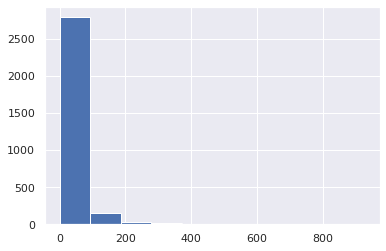

In [ ]:
import matplotlib.pyplot as plt
plt.hist([len(i) for i in sequences],bins=10)

total sequences length after tokenization greater than 200 is 51

total sequences length after tokenization between 200 and 150 is 29

total sequences length after tokenization less than 150 is 2920

total sequences length after tokenization less than 120 is 2875

**conclusion** - 96% of the sequences length is less than 120.

Vocab_Size is 5104 after checking from word_index

In [ ]:
c=[len(i) for i in sequences]           # list of length of sequences 

In [ ]:
j=0                                     # To check how many sequences have length less than 120.
for i in c:
  if i<120:
    j=j+1
j    

2875

In [ ]:
j=0                                    # To check how many sequences have length less than 150.
for i in c:
  if i<150:
    j=j+1
j

2920

In [ ]:
j=0                                     # To check how many sequences have length less than 200 but greater than 150.
for i in c:
  if 150<=i and i<=200:
    j=j+1

j    

29

In [ ]:
j=0                                     # To check how many sequences have length more  than 200.
for i in c:
  if i>200:
    j=j+1
j    

51

In [ ]:
padded = pad_sequences(sequences,maxlen=120, truncating='post',padding='post') 

In [ ]:
print(padded.shape)
print(type(padded))

(3000, 120)
<class 'numpy.ndarray'>


In [ ]:
labels=data['target']
labels.shape
#labels=np.array(labels)
labels.unique()

array([4, 3, 0, 1, 2], dtype=int8)

In [ ]:
print(word_index)

{'[UNK]': 1, 'please': 2, 'regards': 3, 'hi': 4, 'thank': 5, 'hello': 6, 'card': 7, 'sent': 8, 'you': 9, 're': 10, 'thanks': 11, 'pm': 12, 'for': 13, 'kind': 14, 'access': 15, 'dear': 16, 'best': 17, 'help': 18, 'have': 19, 'engineer': 20, 'with': 21, 'floor': 22, 'by': 23, 'friday': 24, 'si': 25, 'la': 26, 'cards': 27, 'tuesday': 28, 'can': 29, 'we': 30, 'wednesday': 31, 'details': 32, 'visitor': 33, 'thursday': 34, 'name': 35, 'lost': 36, 'log': 37, 'senior': 38, 'has': 39, 'be': 40, 'october': 41, 'ext': 42, 'information': 43, 'va': 44, 'leaver': 45, 'issue': 46, 'event': 47, 'if': 48, 'let': 49, 'could': 50, 'also': 51, 'attached': 52, 'ca': 53, 'form': 54, 'en': 55, 'number': 56, 'area': 57, 'working': 58, 'officer': 59, 'december': 60, 'november': 61, 'item': 62, 'work': 63, 'july': 64, 'order': 65, 'care': 66, 'or': 67, 'link': 68, 'monday': 69, 'analyst': 70, 'assign': 71, 'change': 72, 'date': 73, 'down': 74, 'manager': 75, 'high': 76, 'client': 77, 'receive': 78, 'update': 79

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5100, 64, input_length=120),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 120, 64)           326400    
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 55        
Total params: 360,129
Trainable params: 360,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
history = model.fit(padded,labels, epochs=num_epochs,batch_size=32 )

In [ ]:
model.predict_classes(padded)[895]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


3

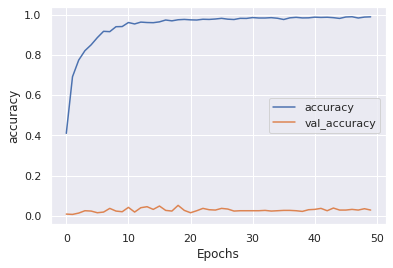

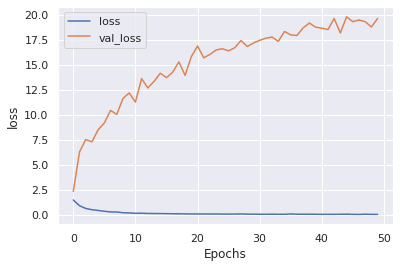

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# **Shuffling the Dataset and Training with LSTM**

In [40]:
data.head()

,Description,target
0,hi since recruiter lead permission approve req...,4
1,re expire days hi ask help update passwords co...,4
2,verification warning hi has got attached pleas...,4
3,please dear looks blacklisted receiving mails ...,4
4,dear modules report report cost thank much reg...,4


In [41]:
df_shuffle=data.sample(frac=1)

In [42]:
df_shuffle.head()

,Description,target
1801,friday november pm assistants please secure fl...,1
2521,original message sent february error drive enc...,0
2862,sent monday october re la central hi let get r...,3
1692,thursday february si la front si,1
1596,thursday secured area tower hello please secur...,1


In [43]:
training_sentences=[]
for i in df_shuffle['Description']:
  training_sentences.append(i)

In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [45]:
tokenizer = Tokenizer(oov_token="[UNK]")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)

In [46]:
vocab_size=len(word_index)+1

In [47]:
padded = pad_sequences(sequences,maxlen=120, truncating='post',padding='post') 

In [48]:
print(padded.shape)
print(type(padded))

(3000, 120)
<class 'numpy.ndarray'>


In [49]:
labels=df_shuffle['target']
labels.shape
#ls=np.array(labels)
print(labels[:3])
labels.unique()

1801    1
2521    0
2862    3
Name: target, dtype: int8


array([1, 0, 3, 4, 2], dtype=int8)

In [50]:
print(word_index)

{'[UNK]': 1, 'please': 2, 'regards': 3, 'hi': 4, 'thank': 5, 'hello': 6, 'card': 7, 'sent': 8, 'you': 9, 're': 10, 'thanks': 11, 'pm': 12, 'for': 13, 'kind': 14, 'access': 15, 'dear': 16, 'best': 17, 'help': 18, 'have': 19, 'engineer': 20, 'with': 21, 'floor': 22, 'by': 23, 'friday': 24, 'si': 25, 'la': 26, 'cards': 27, 'tuesday': 28, 'can': 29, 'we': 30, 'wednesday': 31, 'details': 32, 'visitor': 33, 'thursday': 34, 'name': 35, 'lost': 36, 'log': 37, 'senior': 38, 'has': 39, 'be': 40, 'october': 41, 'ext': 42, 'information': 43, 'va': 44, 'leaver': 45, 'issue': 46, 'event': 47, 'if': 48, 'let': 49, 'could': 50, 'also': 51, 'attached': 52, 'ca': 53, 'form': 54, 'en': 55, 'number': 56, 'area': 57, 'officer': 58, 'working': 59, 'december': 60, 'november': 61, 'item': 62, 'july': 63, 'work': 64, 'order': 65, 'care': 66, 'or': 67, 'link': 68, 'monday': 69, 'analyst': 70, 'assign': 71, 'change': 72, 'down': 73, 'manager': 74, 'date': 75, 'client': 76, 'high': 77, 'receive': 78, 'problem': 7

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64,input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 64)           326720    
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 128)          66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 10)                650       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
Total params: 434,689
Trainable params: 434,689
Non-trainable params: 0
_________________________________________________________________


In [52]:
num_epochs = 20
history = model.fit(padded,labels, epochs=num_epochs,batch_size=32 )

Epoch 1/50
94/94 [==============================] - 26s 207ms/step - loss: 1.5317 - accuracy: 0.2945
Epoch 2/50
94/94 [==============================] - 19s 207ms/step - loss: 0.9777 - accuracy: 0.6102
Epoch 3/50
94/94 [==============================] - 19s 207ms/step - loss: 0.6732 - accuracy: 0.7816
Epoch 4/50
94/94 [==============================] - 20s 208ms/step - loss: 0.4801 - accuracy: 0.8478
Epoch 5/50
94/94 [==============================] - 20s 207ms/step - loss: 0.3399 - accuracy: 0.8945
Epoch 6/50
94/94 [==============================] - 19s 207ms/step - loss: 0.2635 - accuracy: 0.9230
Epoch 7/50
94/94 [==============================] - 19s 205ms/step - loss: 0.2048 - accuracy: 0.9443
Epoch 8/50
94/94 [==============================] - 19s 207ms/step - loss: 0.1850 - accuracy: 0.9505
Epoch 9/50
94/94 [==============================] - 19s 206ms/step - loss: 0.1568 - accuracy: 0.9565
Epoch 10/50
51/94 [===============>..............] - ETA: 8s - loss: 0.1379 - accuracy: 0.9

KeyboardInterrupt: ignored

In [ ]:
model.save("modelLSTM.h5")

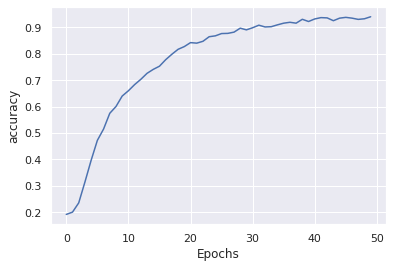

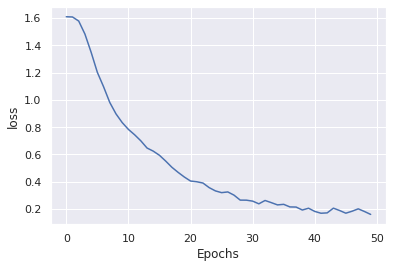

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  #plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  #plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# **Inference**

In [ ]:
model.predict_classes(padded)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([4, 0, 4, ..., 3, 3, 3])

In [ ]:
Description=df_shuffle['Description'][432]
sequences = tokenizer.texts_to_sequences([Description])
padded = pad_sequences(sequences,maxlen=120, truncating='post',padding='post')
predicted=model.predict_classes(padded)
print('Predicted label:',predicted[0])
print()
print('Correct label:',df_shuffle['target'][432])
print()

Predicted label: 4

Correct label: 4



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# **Conclusion**

The size of the dataset is only 3000 due to this the model is overfitting.

Got accuracy 94% on training dataset.

Got very low validation accuracy.

 **Solution**

**Need more training Dataset to avoid overfitting**


# **Using Bert**

In [ ]:
import tensorflow as tf


In [ ]:
!pip install transformers

     |████████████████████████████████| 2.2MB 5.8MB/s 
     |████████████████████████████████| 3.3MB 22.7MB/s 
     |████████████████████████████████| 870kB 47.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=5cde63b8f3e2931b5dd28e144e10834c9404057a9c47e888b00327c759b1551b
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sacremoses


In [ ]:
from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert = TFBertModel.from_pretrained("bert-base-uncased")


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
df_shuffle=data.sample(frac=1)

In [ ]:
df_shuffle.head()

,Description,target
1381,enable others hi please help points please ena...,1
1194,dear please setup parameters commercial code m...,0
180,release please update confluence she key pleas...,4
1360,expertise central station recognize please tha...,1
397,storage dear colleagues please folder best reg...,4


In [ ]:
training_sentences=[]
for i in df_shuffle['Description']:
  training_sentences.append(i)

In [ ]:
df_shuffle['input_id']=df_shuffle['Description'].apply(lambda x: tokenizer.encode_plus( x,add_special_tokens=True,return_attention_mask=True,padding='max_length', max_length=120,return_token_type_ids=False,truncation=True)['input_ids'])

In [ ]:
df_shuffle['attention_mask']=df_shuffle['Description'].apply(lambda x: tokenizer.encode_plus( x,add_special_tokens=True,return_attention_mask=True,padding='max_length', max_length=120,return_token_type_ids=False,truncation=True)['attention_mask'])

In [ ]:
df_shuffle.head()

,Description,target,input_id,attention_mask
1381,enable others hi please help points please ena...,1,"[101, 9585, 2500, 7632, 3531, 2393, 2685, 3531...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1194,dear please setup parameters commercial code m...,0,"[101, 6203, 3531, 16437, 11709, 3293, 3642, 22...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
180,release please update confluence she key pleas...,4,"[101, 2713, 3531, 10651, 13693, 2016, 3145, 35...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1360,expertise central station recognize please tha...,1,"[101, 11532, 2430, 2276, 6807, 3531, 4283, 798...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
397,storage dear colleagues please folder best reg...,4,"[101, 5527, 6203, 8628, 3531, 19622, 2190, 123...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
df_bert=df_shuffle.reset_index(drop=True)

In [ ]:
df_bert.head()

,Description,target,input_id,attention_mask
0,enable others hi please help points please ena...,1,"[101, 9585, 2500, 7632, 3531, 2393, 2685, 3531...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,dear please setup parameters commercial code m...,0,"[101, 6203, 3531, 16437, 11709, 3293, 3642, 22...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,release please update confluence she key pleas...,4,"[101, 2713, 3531, 10651, 13693, 2016, 3145, 35...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,expertise central station recognize please tha...,1,"[101, 11532, 2430, 2276, 6807, 3531, 4283, 798...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,storage dear colleagues please folder best reg...,4,"[101, 5527, 6203, 8628, 3531, 19622, 2190, 123...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
input_ids=[]
for i in df_bert['input_id']:
  input_ids.append(i)

In [ ]:
attention_mask=[]
for i in df_bert['attention_mask']:
  attention_mask.append(i)

In [ ]:
len(input_ids)

3000

In [ ]:
Xids=np.array(input_ids)
print(Xids.shape)

(3000, 120)


In [ ]:
Xmask=np.array(attention_mask)
print(Xmask.shape)

(3000, 120)


In [ ]:
labels=df_bert['target']
labels.shape


(3000,)

In [ ]:
Xids.shape,Xmask.shape,labels.shape

((3000, 120), (3000, 120), (3000,))

In [ ]:
# load arrays into tensorflow dataset
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask,labels))
dataset.element_spec

(TensorSpec(shape=(120,), dtype=tf.int64, name=None),
 TensorSpec(shape=(120,), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int8, name=None))

In [ ]:
# create a mapping function that we use to restructure our dataset
def map_func(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

#usi ng map method to apply map_func to dataset
dataset = dataset.map(map_func)
dataset.element_spec   

({'attention_mask': TensorSpec(shape=(120,), dtype=tf.int64, name=None),
  'input_ids': TensorSpec(shape=(120,), dtype=tf.int64, name=None)},
 TensorSpec(shape=(), dtype=tf.int8, name=None))

In [ ]:
#shuffle data and batch it
BATCH_SIZE=32
dataset = dataset.shuffle(10000).batch(BATCH_SIZE)
dataset.element_spec

({'attention_mask': TensorSpec(shape=(None, 120), dtype=tf.int64, name=None),
  'input_ids': TensorSpec(shape=(None, 120), dtype=tf.int64, name=None)},
 TensorSpec(shape=(None,), dtype=tf.int8, name=None))

In [ ]:
DS_LEN = len([0 for batch in dataset])
SPLIT = 0.9  # 90-10 split
print('Total batches:',DS_LEN)

Total batches: 94


In [ ]:
train = dataset.take(round(DS_LEN*SPLIT))  # get first 90% of batches
val = dataset.skip(round(DS_LEN*SPLIT))  # skip first 90% and keep final 10%

In [ ]:

input_ids = tf.keras.layers.Input(shape=(120,), name='input_ids', dtype='int64')
mask = tf.keras.layers.Input(shape=(120,), name='attention_mask', dtype='int64')

embeddings = bert.bert(input_ids,attention_mask=mask)[0]

X = tf.keras.layers.LSTM(64)(embeddings)  #64
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(64, activation='relu')(X)  #64
X = tf.keras.layers.Dropout(0.1)(X)
y = tf.keras.layers.Dense(5, activation='sigmoid', name='outputs')(X)

# define input and output layers of our model
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

# freeze the BERT layer - otherwise we will be training 100M+ parameters...
model.layers[2].trainable = False

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 120)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 120)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 64)           213248      bert[1][0]                 

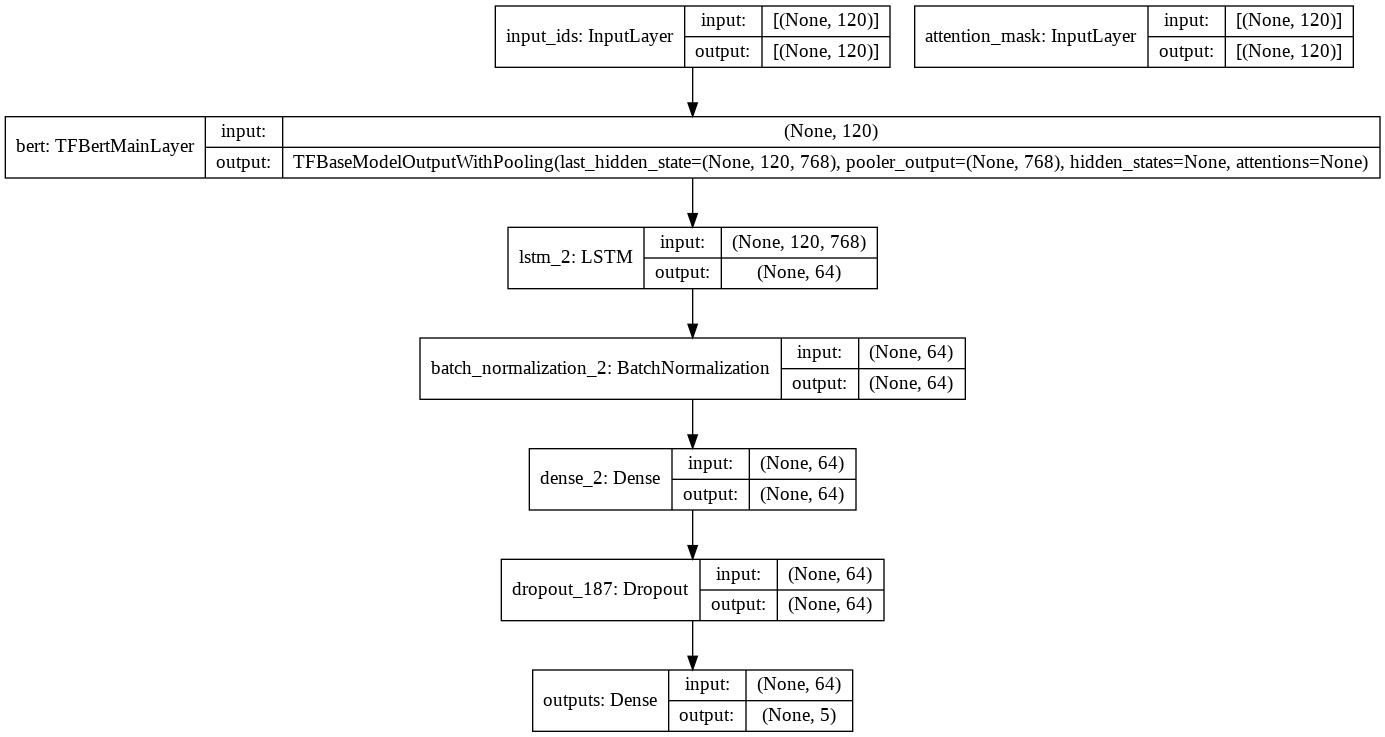

In [ ]:
model.summary()
tf.keras.utils.plot_model( model,show_shapes=True)

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.01)
loss=tf.keras.losses.SparseCategoricalCrossentropy()
acc = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

history = model.fit(train, validation_data=val, epochs=5)

Epoch 1/5
85/85 [==============================] - 1316s 15s/step - loss: 1.4896 - accuracy: 0.3888 - val_loss: 1.2767 - val_accuracy: 0.5000
Epoch 2/5
85/85 [==============================] - 1281s 15s/step - loss: 1.0740 - accuracy: 0.5787 - val_loss: 1.1475 - val_accuracy: 0.5750
Epoch 3/5
85/85 [==============================] - 1299s 15s/step - loss: 0.9661 - accuracy: 0.6185 - val_loss: 0.9450 - val_accuracy: 0.6250
Epoch 4/5
85/85 [==============================] - 1296s 15s/step - loss: 0.9281 - accuracy: 0.6273 - val_loss: 0.9152 - val_accuracy: 0.6679
Epoch 5/5
85/85 [==============================] - 1279s 15s/step - loss: 0.8533 - accuracy: 0.6640 - val_loss: 1.1570 - val_accuracy: 0.5500


In [ ]:
history = model.fit(train, validation_data=val, epochs=10)

Epoch 1/10
85/85 [==============================] - 1301s 15s/step - loss: 0.8629 - accuracy: 0.6614 - val_loss: 1.1559 - val_accuracy: 0.5357
Epoch 2/10
85/85 [==============================] - 1297s 15s/step - loss: 0.8526 - accuracy: 0.6717 - val_loss: 1.3181 - val_accuracy: 0.5464
Epoch 3/10
85/85 [==============================] - 1288s 15s/step - loss: 0.8126 - accuracy: 0.6783 - val_loss: 0.8336 - val_accuracy: 0.7179
Epoch 4/10
85/85 [==============================] - 1300s 15s/step - loss: 0.7969 - accuracy: 0.6893 - val_loss: 0.6793 - val_accuracy: 0.7500
Epoch 5/10
85/85 [==============================] - 1304s 15s/step - loss: 0.7735 - accuracy: 0.7037 - val_loss: 0.7229 - val_accuracy: 0.7179
Epoch 6/10
85/85 [==============================] - 1302s 15s/step - loss: 0.7798 - accuracy: 0.6993 - val_loss: 0.6706 - val_accuracy: 0.7500
Epoch 7/10
85/85 [==============================] - 1311s 15s/step - loss: 0.7567 - accuracy: 0.7184 - val_loss: 0.6647 - val_accuracy: 0.7536

In [ ]:
history = model.fit(train, validation_data=val, epochs=5)

Epoch 1/5
85/85 [==============================] - 1301s 15s/step - loss: 0.7085 - accuracy: 0.7353 - val_loss: 0.7895 - val_accuracy: 0.6679
Epoch 2/5
85/85 [==============================] - 1331s 16s/step - loss: 0.7423 - accuracy: 0.7213 - val_loss: 0.8347 - val_accuracy: 0.6929
Epoch 3/5
85/85 [==============================] - 1304s 15s/step - loss: 0.7105 - accuracy: 0.7426 - val_loss: 0.9436 - val_accuracy: 0.6607
Epoch 4/5
85/85 [==============================] - 1304s 15s/step - loss: 0.7103 - accuracy: 0.7415 - val_loss: 0.5691 - val_accuracy: 0.7964
Epoch 5/5
85/85 [==============================] - 1318s 16s/step - loss: 0.6781 - accuracy: 0.7533 - val_loss: 0.6419 - val_accuracy: 0.7500


In [ ]:
history = model.fit(train, validation_data=val, epochs=5)

Epoch 1/5
85/85 [==============================] - 1316s 15s/step - loss: 0.6717 - accuracy: 0.7592 - val_loss: 0.5666 - val_accuracy: 0.7857
Epoch 2/5
85/85 [==============================] - 1312s 15s/step - loss: 0.6704 - accuracy: 0.7544 - val_loss: 0.5140 - val_accuracy: 0.8143
Epoch 3/5
85/85 [==============================] - 1315s 15s/step - loss: 0.6292 - accuracy: 0.7772 - val_loss: 0.6210 - val_accuracy: 0.8071
Epoch 4/5
85/85 [==============================] - 1303s 15s/step - loss: 0.6708 - accuracy: 0.7493 - val_loss: 0.5534 - val_accuracy: 0.7964
Epoch 5/5
85/85 [==============================] - 1297s 15s/step - loss: 0.7024 - accuracy: 0.7393 - val_loss: 0.6655 - val_accuracy: 0.7464


In [ ]:
model.save("bert25")

INFO:tensorflow:Assets written to: bert25/assets


INFO:tensorflow:Assets written to: bert25/assets


In [ ]:
#reconstructed_model = tf.keras.models.load_model("bert15")

In [ ]:
#reconstructed_model.fit(train, validation_data=val, epochs=5)

In [ ]:
#tf.saved_model.save(model,export_dir='/content/bert_model1ep0ch')

In [ ]:
#reloaded = tf.saved_model.load("/content/bert_model")

In [ ]:
#reloaded([Xids[:2],Xmask[:2]])

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[0.93089473, 0.003187  , 0.9522673 , 0.9920757 , 0.00136679],
       [0.9449994 , 0.04613665, 0.14239168, 0.41144764, 0.29087162]],
      dtype=float32)>

In [ ]:
#model.predict([Xids[:2],Xmask[:2]] )

array([[0.38404793, 0.69146156, 0.53208697, 0.35485724, 0.7785202 ],
       [0.21781683, 0.8576658 , 0.6844109 , 0.23241305, 0.43110356]],
      dtype=float32)

In [ ]:
#np.argmax(model.predict_on_batch([Xids[:2],Xmask[:2]])[0])

4

In [ ]:
#history.history

{'accuracy': [0.48676469922065735],
 'loss': [1.2708975076675415],
 'val_accuracy': [0.4642857015132904],
 'val_loss': [1.2996654510498047]}

In [ ]:
#model.evaluate(val)

9/9 [==============================] - 108s 12s/step - loss: 1.3134 - accuracy: 0.4321


[1.3134225606918335, 0.43214285373687744]

In [ ]:
#model.metrics_names

['loss', 'accuracy']

In [ ]:
#pre=model.predict(val)
#pre

array([[0.5427923 , 0.5904651 , 0.7480428 , 0.40145347, 0.49321935],
       [0.5394826 , 0.6569642 , 0.5119229 , 0.5347419 , 0.6163031 ],
       [0.5292085 , 0.6190463 , 0.74035674, 0.32501975, 0.5758497 ],
       ...,
       [0.48292688, 0.6649809 , 0.5027335 , 0.34280667, 0.7304198 ],
       [0.34397453, 0.8135228 , 0.49511576, 0.39541048, 0.6595168 ],
       [0.2902776 , 0.8745601 , 0.437628  , 0.35180235, 0.76301646]],
      dtype=float32)

In [ ]:
#np.argmax(pre,axis=1)

array([2, 1, 2, 1, 4, 4, 4, 1, 4, 4, 4, 1, 1, 4, 1, 1, 4, 1, 4, 2, 1, 1,
       2, 1, 2, 1, 1, 1, 4, 1, 1, 1, 4, 0, 4, 1, 1, 4, 3, 4, 4, 4, 4, 1,
       4, 0, 4, 4, 4, 1, 1, 2, 1, 2, 4, 3, 0, 1, 4, 4, 4, 4, 2, 4, 4, 4,
       0, 4, 1, 4, 2, 4, 1, 4, 4, 1, 4, 1, 4, 3, 4, 4, 1, 1, 4, 2, 4, 1,
       2, 1, 0, 0, 1, 2, 4, 1, 1, 2, 4, 1, 1, 1, 1, 4, 4, 0, 4, 1, 0, 2,
       4, 1, 3, 3, 1, 4, 4, 4, 4, 1, 4, 1, 1, 4, 1, 1, 1, 2, 4, 4, 2, 1,
       1, 4, 4, 1, 2, 1, 1, 4, 1, 4, 1, 1, 0, 3, 4, 4, 1, 2, 2, 2, 4, 4,
       3, 1, 4, 1, 4, 1, 2, 4, 1, 1, 4, 1, 3, 2, 4, 4, 0, 1, 4, 2, 4, 1,
       4, 4, 4, 4, 1, 1, 4, 1, 1, 3, 1, 1, 4, 4, 2, 3, 4, 4, 4, 0, 1, 4,
       1, 0, 1, 1, 2, 4, 4, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 0, 4, 4, 4,
       1, 4, 2, 4, 2, 1, 2, 1, 4, 4, 4, 4, 1, 1, 2, 2, 1, 2, 4, 1, 1, 2,
       1, 1, 4, 4, 4, 2, 1, 1, 1, 4, 2, 1, 2, 4, 1, 0, 1, 1, 1, 2, 1, 4,
       1, 2, 1, 4, 1, 2, 4, 4, 4, 2, 3, 2, 1, 4, 1, 1])

In [ ]:
#np.argmax(reloaded([Xids[:3],Xmask[:3]]),axis=1)

array([3, 0, 1])